<a href="https://colab.research.google.com/github/vijaygwu/algorithms/blob/main/Shortest_Path_in_Binary_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1091. Shortest Path in Binary Matrix**

Given an n x n binary matrix grid, return the length of the shortest clear path in the matrix. If there is no clear path, return -1.

A clear path in a binary matrix is a path from the top-left cell (i.e., (0, 0)) to the bottom-right cell (i.e., (n - 1, n - 1)) such that:

All the visited cells of the path are 0.
All the adjacent cells of the path are 8-directionally connected (i.e., they are different and they share an edge or a corner).
The length of a clear path is the number of visited cells of this path.

**Example 1:**
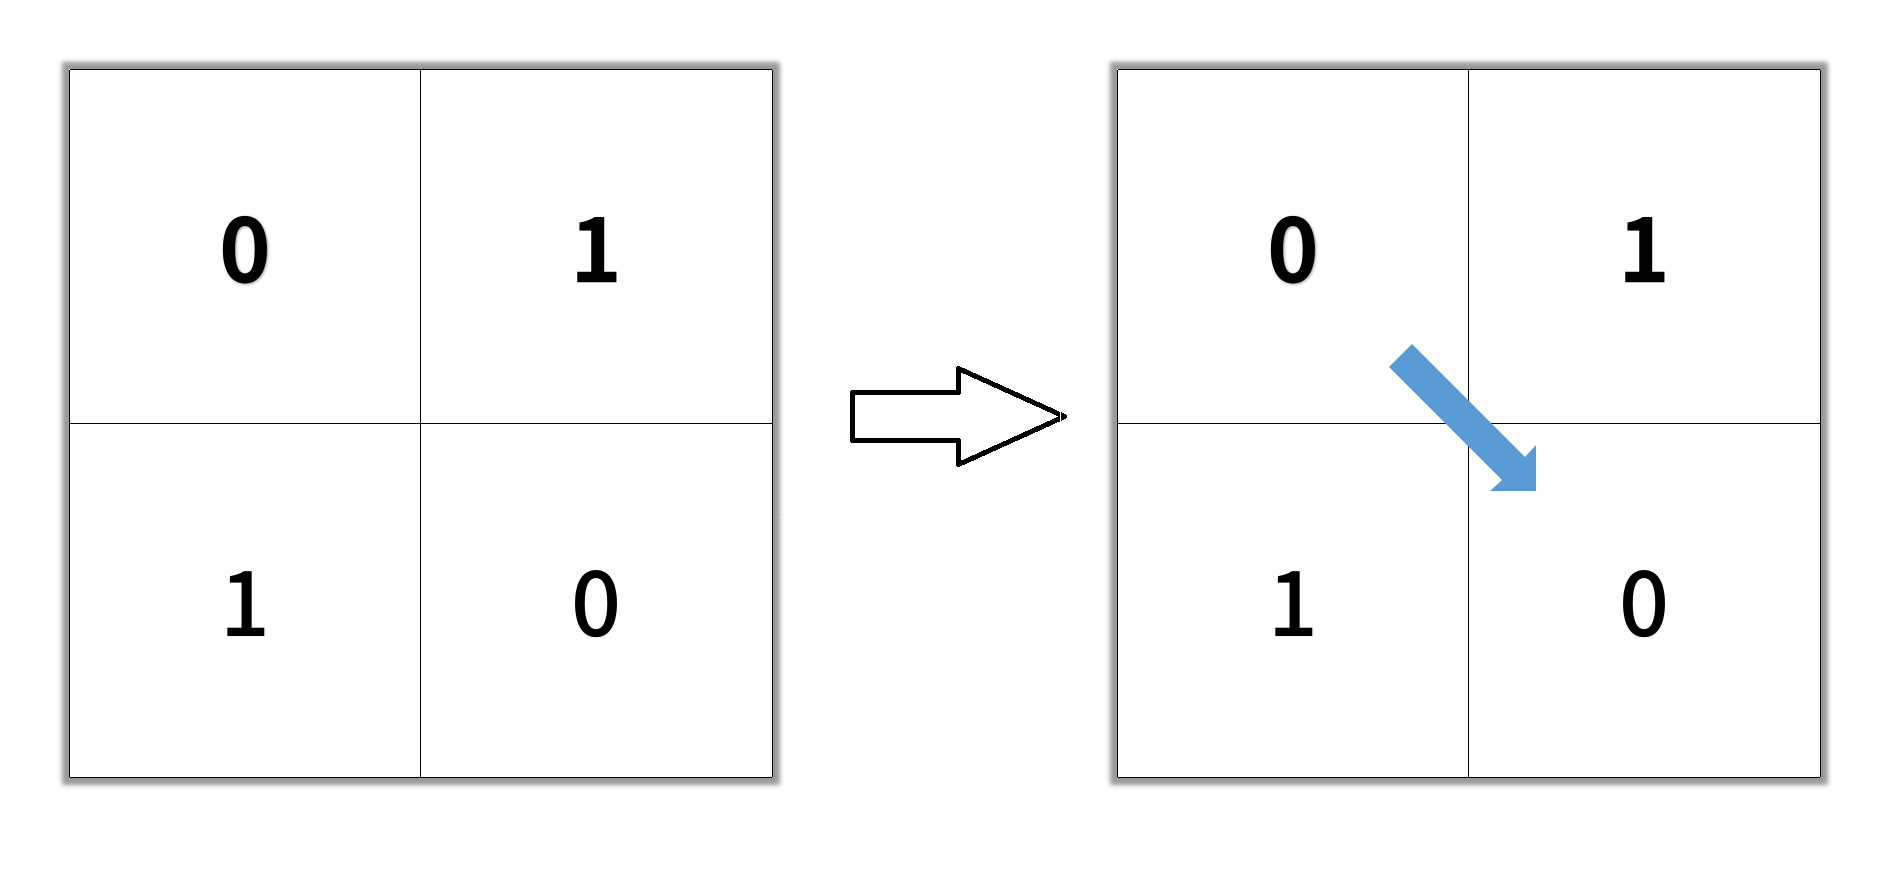

Input: grid = [[0,1],[1,0]]
Output: 2

**Example 2:**

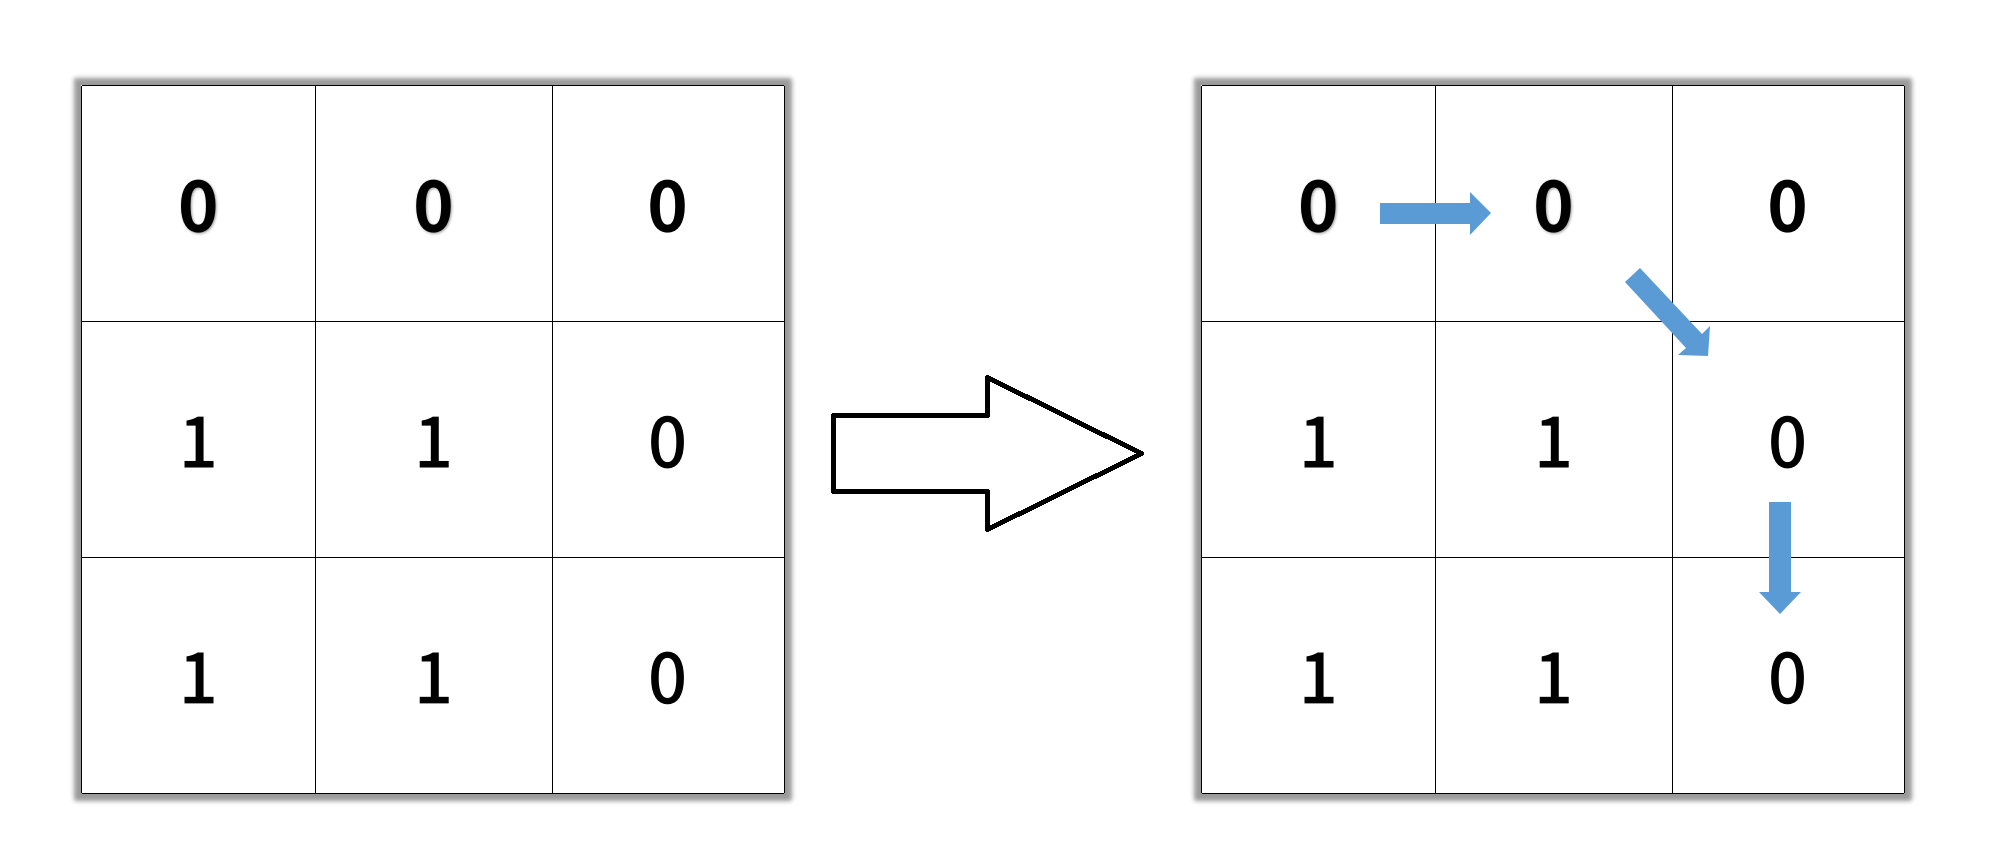

Input: grid = [[0,0,0],[1,1,0],[1,1,0]]
Output: 4

**Example 3:**
Input: grid = [[1,0,0],[1,1,0],[1,1,0]]
Output: -1

This solution finds the shortest path through a binary matrix from the top-left corner to the bottom-right corner using Breadth-First Search (BFS). Let me explain how it works:

```python
class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:
        
        max_row = len(grid) - 1
        max_col = len(grid[0]) - 1
        directions = [
            (-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        
        # Helper function to find the neighbors of a given cell.
        def get_neighbours(row, col):
            for row_difference, col_difference in directions:
                new_row = row + row_difference
                new_col = col + col_difference
                if not(0 <= new_row <= max_row and 0 <= new_col <= max_col):
                    continue
                if grid[new_row][new_col] != 0:
                    continue
                yield (new_row, new_col)
        
        # Check that the first and last cells are open.
        if grid[0][0] != 0 or grid[max_row][max_col] != 0:
            return -1
        
        # Set up the BFS.
        queue = deque()
        queue.append((0, 0))
        grid[0][0] = 1
        
        # Carry out the BFS.
        while queue:
            row, col = queue.popleft()
            distance = grid[row][col]
            if (row, col) == (max_row, max_col):
                return distance
            for neighbour_row, neighbour_col in get_neighbours(row, col):
                grid[neighbour_row][neighbour_col] = distance + 1
                queue.append((neighbour_row, neighbour_col))
        
        # There was no path.
        return -1
```

Here's the step-by-step explanation:

1. **Grid Setup**:
   - Determines the dimensions of the grid
   - Defines all 8 possible directions to move (horizontal, vertical, and diagonal)

2. **get_neighbours Function**:
   - Takes a cell position (row, col)
   - Checks all 8 adjacent cells
   - Only yields cells that are within bounds and contain 0 (open path)

3. **Initial Checks**:
   - If either the start cell (0,0) or end cell (max_row, max_col) is blocked (not 0), returns -1

4. **BFS Implementation**:
   - Uses a queue (from collections.deque) to process cells in order of distance from start
   - Starts at position (0,0)
   - Marks the starting cell with value 1 (representing the distance)

5. **Path Finding**:
   - For each cell, checks if it's the destination
   - If so, returns the current distance
   - Otherwise, finds all valid neighbors (open cells)
   - Updates each neighbor's value in the grid to current distance + 1
   - Adds these neighbors to the queue

6. **Distance Tracking**:
   - Cleverly uses the grid itself to store distances
   - Each cell's value becomes the length of the shortest path to reach it

7. **Path Existence**:
   - If the queue empties without finding the destination, returns -1 (no path exists)

This approach ensures we find the shortest path because BFS explores all cells at distance 1 before moving to distance 2, and so on. The time complexity is O(N) where N is the number of cells in the grid, and space complexity is O(N) in the worst case for the queue.

Note: This solution requires importing `deque` from the `collections` module.

In [1]:
from typing import List
from collections import deque


class Solution:
    def shortestPathBinaryMatrix(self, grid: List[List[int]]) -> int:

        max_row = len(grid) - 1
        max_col = len(grid[0]) - 1
        directions = [
            (-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]

        # Helper function to find the neighbors of a given cell.
        def get_neighbours(row, col):
            for row_difference, col_difference in directions:
                new_row = row + row_difference
                new_col = col + col_difference
                if not(0 <= new_row <= max_row and 0 <= new_col <= max_col):
                    continue
                if grid[new_row][new_col] != 0:
                    continue
                yield (new_row, new_col)

        # Check that the first and last cells are open.
        if grid[0][0] != 0 or grid[max_row][max_col] != 0:
            return -1

        # Set up the BFS.
        queue = deque()
        queue.append((0, 0))
        grid[0][0] = 1

        # Carry out the BFS.
        while queue:
            row, col = queue.popleft()
            distance = grid[row][col]
            if (row, col) == (max_row, max_col):
                return distance
            for neighbour_row, neighbour_col in get_neighbours(row, col):
                grid[neighbour_row][neighbour_col] = distance + 1
                queue.append((neighbour_row, neighbour_col))

        # There was no path.
        return -1

In [2]:
# Create test cases
def run_tests():
    # Initialize the Solution class
    solution = Solution()

    # Test case 1: Simple path exists
    grid1 = [
        [0, 0, 0],
        [1, 1, 0],
        [1, 1, 0]
    ]
    expected1 = 4
    result1 = solution.shortestPathBinaryMatrix(grid1.copy())  # Use copy to preserve original grid
    print(f"Test 1: Expected {expected1}, Got {result1}, {'PASS' if result1 == expected1 else 'FAIL'}")

    # Test case 2: No path exists (start cell blocked)
    grid2 = [
        [1, 0, 0],
        [0, 0, 0],
        [0, 0, 0]
    ]
    expected2 = -1
    result2 = solution.shortestPathBinaryMatrix(grid2.copy())
    print(f"Test 2: Expected {expected2}, Got {result2}, {'PASS' if result2 == expected2 else 'FAIL'}")

    # Test case 3: No path exists (end cell blocked)
    grid3 = [
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 1]
    ]
    expected3 = -1
    result3 = solution.shortestPathBinaryMatrix(grid3.copy())
    print(f"Test 3: Expected {expected3}, Got {result3}, {'PASS' if result3 == expected3 else 'FAIL'}")

    # Test case 4: No path exists (path blocked)
    grid4 = [
        [0, 0, 0],
        [1, 1, 1],
        [0, 0, 0]
    ]
    expected4 = -1
    result4 = solution.shortestPathBinaryMatrix(grid4.copy())
    print(f"Test 4: Expected {expected4}, Got {result4}, {'PASS' if result4 == expected4 else 'FAIL'}")

    # Test case 5: Larger grid with multiple paths
    grid5 = [
        [0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1],
        [0, 0, 0, 0, 0]
    ]
    expected5 = 8
    result5 = solution.shortestPathBinaryMatrix(grid5.copy())
    print(f"Test 5: Expected {expected5}, Got {result5}, {'PASS' if result5 == expected5 else 'FAIL'}")

    # Test case 6: Single cell grid
    grid6 = [[0]]
    expected6 = 1
    result6 = solution.shortestPathBinaryMatrix(grid6.copy())
    print(f"Test 6: Expected {expected6}, Got {result6}, {'PASS' if result6 == expected6 else 'FAIL'}")

    # Test case 7: Direct diagonal path
    grid7 = [
        [0, 1, 1],
        [1, 0, 1],
        [1, 1, 0]
    ]
    expected7 = 3
    result7 = solution.shortestPathBinaryMatrix(grid7.copy())
    print(f"Test 7: Expected {expected7}, Got {result7}, {'PASS' if result7 == expected7 else 'FAIL'}")

# Run the tests
if __name__ == "__main__":
    run_tests()

Test 1: Expected 4, Got 4, PASS
Test 2: Expected -1, Got -1, PASS
Test 3: Expected -1, Got -1, PASS
Test 4: Expected -1, Got -1, PASS
Test 5: Expected 8, Got 9, FAIL
Test 6: Expected 1, Got 1, PASS
Test 7: Expected 3, Got 3, PASS
